## Understand The DataSet

## Import Libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Load DataSet

In [64]:
data = pd.read_csv("Colorectal Cancer Patient Data.csv")
data.head(10)

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
5,5,GSM877131,61.0,A,Male,Right,65.0,0.0,1.0,1.0
6,6,GSM877132,59.0,C,Male,Left,32.0,1.0,1.0,1.0
7,7,GSM877133,50.0,B,Male,Right,43.0,1.0,0.0,0.0
8,8,GSM877134,54.0,B,Male,Right,80.0,0.0,1.0,1.0
9,9,GSM877135,68.0,C,Female,Rectum,94.0,0.0,0.0,0.0


In [65]:
data.tail(10)

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
53,53,GSM877180,69.0,D,Male,Right,46.0,1.0,0.0,1.0
54,54,GSM877181,73.0,D,Male,Right,23.0,1.0,0.0,1.0
55,55,GSM877182,55.0,D,Male,Right,14.0,1.0,0.0,0.0
56,56,GSM877183,63.0,D,Male,Rectum,18.0,1.0,1.0,1.0
57,57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0
58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0
61,61,GSM877188,57.0,A,Male,Rectum,68.0,1.0,0.0,0.0
62,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocess DataSet

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       63 non-null     int64  
 1   ID_REF           62 non-null     object 
 2   Age (in years)   62 non-null     float64
 3   Dukes Stage      62 non-null     object 
 4   Gender           62 non-null     object 
 5   Location         62 non-null     object 
 6   DFS (in months)  62 non-null     float64
 7   DFS event        62 non-null     float64
 8   Adj_Radio        62 non-null     float64
 9   Adj_Chem         62 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.1+ KB


In [67]:
data.isnull().sum()

Unnamed: 0         0
ID_REF             1
Age (in years)     1
Dukes Stage        1
Gender             1
Location           1
DFS (in months)    1
DFS event          1
Adj_Radio          1
Adj_Chem           1
dtype: int64

In [68]:
data = data.dropna()

In [69]:
data.isnull().sum()

Unnamed: 0         0
ID_REF             0
Age (in years)     0
Dukes Stage        0
Gender             0
Location           0
DFS (in months)    0
DFS event          0
Adj_Radio          0
Adj_Chem           0
dtype: int64

In [70]:
# encode categorical values

label_encoder = LabelEncoder()

columns_to_encode = ['Dukes Stage', 'Gender', 'Location']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [71]:
data.head(10)

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62.0,0,1,1,108.0,0.0,1.0,0.0
1,1,GSM877127,77.0,1,1,1,40.0,1.0,1.0,0.0
2,2,GSM877128,66.0,2,0,1,49.0,0.0,1.0,0.0
3,3,GSM877129,72.0,3,0,1,45.0,0.0,1.0,1.0
4,4,GSM877130,75.0,2,1,1,40.0,0.0,0.0,1.0
5,5,GSM877131,61.0,0,1,3,65.0,0.0,1.0,1.0
6,6,GSM877132,59.0,2,1,1,32.0,1.0,1.0,1.0
7,7,GSM877133,50.0,1,1,3,43.0,1.0,0.0,0.0
8,8,GSM877134,54.0,1,1,3,80.0,0.0,1.0,1.0
9,9,GSM877135,68.0,2,0,2,94.0,0.0,0.0,0.0


## DataSet Visualization

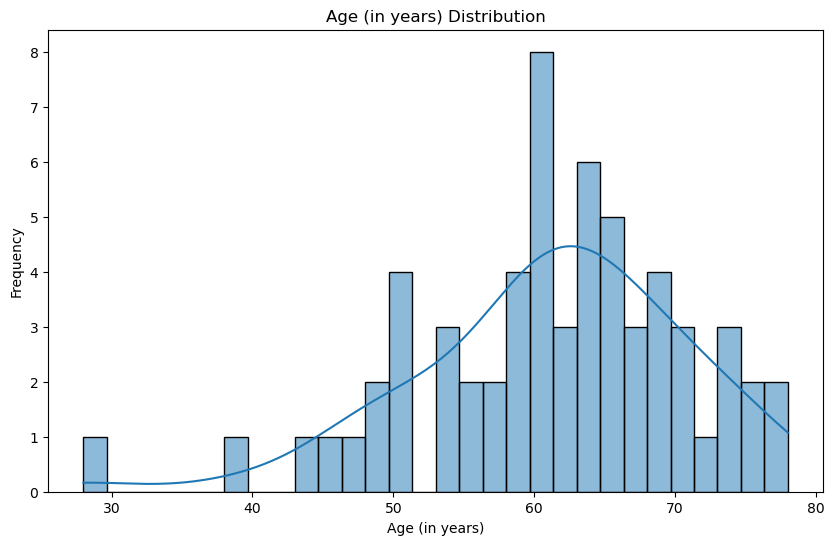

In [72]:
# Visualize Age Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Age (in years)'], bins=30, kde=True)
plt.title('Age (in years) Distribution')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.show()

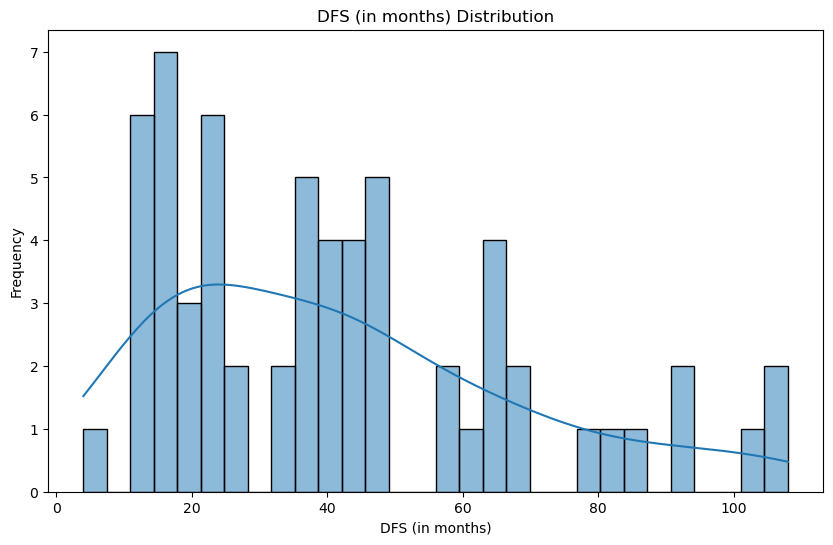

In [73]:
# Visualize DFS (in months) Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['DFS (in months)'], bins=30, kde=True)
plt.title('DFS (in months) Distribution')
plt.xlabel('DFS (in months)')
plt.ylabel('Frequency')
plt.show()

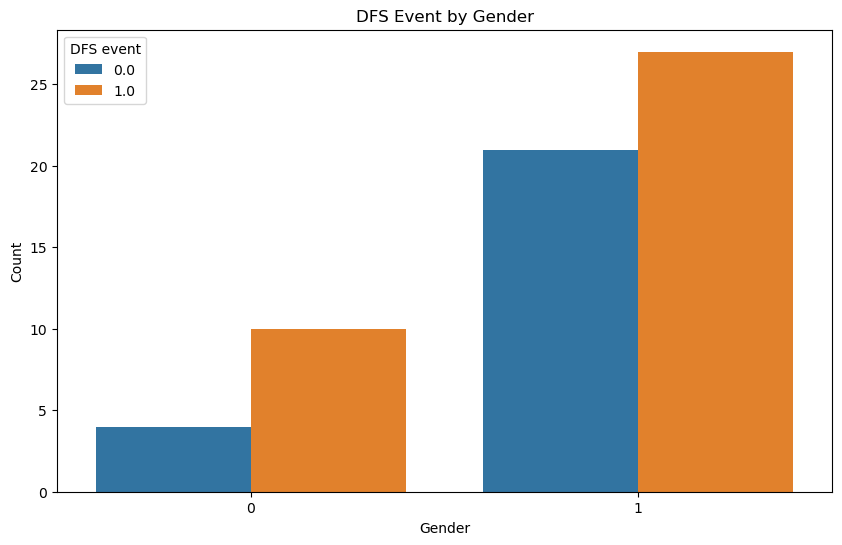

In [74]:
# Visualize DFS Event by Gender
# from dataset 1 is male and 0 is female

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='DFS event', data=data)
plt.title('DFS Event by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

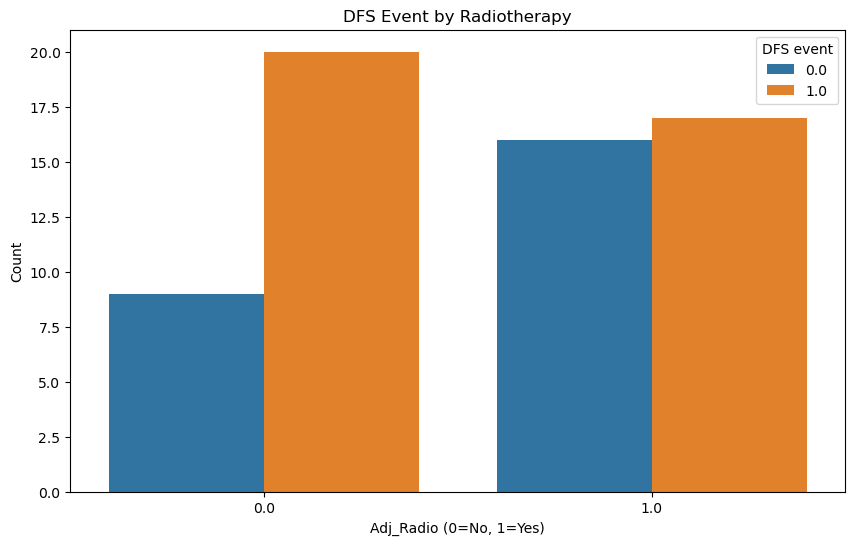

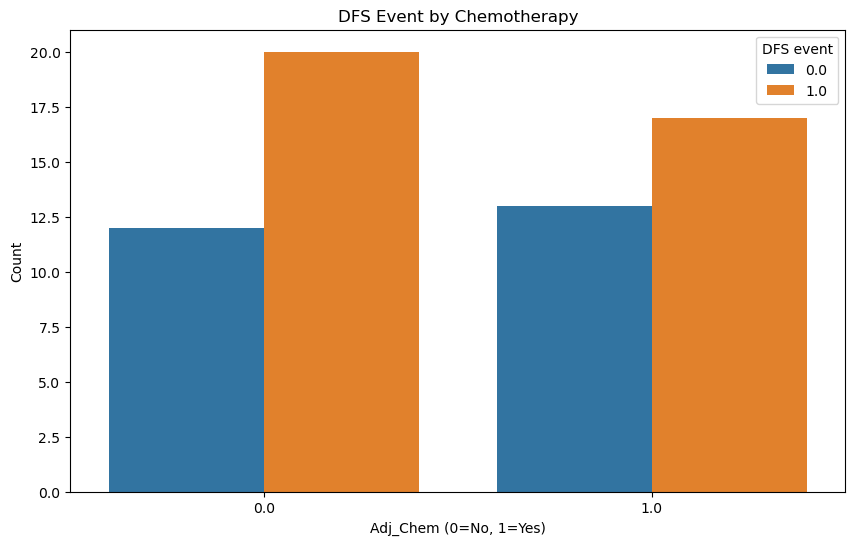

In [75]:
# Visualize Treatment Effect (Adj_Radio and Adj_Chem)

## Adj_Radio Affects DFS event
plt.figure(figsize=(10, 6))
sns.countplot(x='Adj_Radio', hue='DFS event', data=data)
plt.title('DFS Event by Radiotherapy')
plt.xlabel('Adj_Radio (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

## Adj_Chem Affects DFS event
plt.figure(figsize=(10, 6))
sns.countplot(x='Adj_Chem', hue='DFS event', data=data)
plt.title('DFS Event by Chemotherapy')
plt.xlabel('Adj_Chem (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

## Model Training

In [76]:
# Define features and target variable

features = ['Age (in years)', 'DFS (in months)', 'Adj_Radio', 'Adj_Chem', 'Dukes Stage', 'Gender', 'Location']
X = data[features]
y = data['DFS event']

### Train a Random Forest Model

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

In [80]:
# Evaluation
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60         5
         1.0       0.75      0.75      0.75         8

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13

AUC-ROC: 0.8


## Hyperparameter Tuning to optimize the machine learning model's performance by finding the best combination of parameters

In [81]:
# Hyperparameter grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
